# King County House Sales Project
**Authors:** Elena Burlando

## Overview

The objective of this project is to analyze housing data for King County to provide insights on movie types that have performed best in the past decade. 

As an outcome of this analysis we are hoping to get: 
* For real estate agents: 
 * Price drivers 
 * zipcode trends


## Business Problem

Microsoft following the success of other big tech companies is considering setting up a movie studio. This project is aiming to provide valuable information to the head of Microsoft's new movie department in the areas of movies, genres, and ROI. 

***
One of the main business pain points related to this project is lack of experince in the movie industry and using 
data from other sources since it doesn't have any of its own. I picked the questions above as I think the answers to those would be the most beneficial when starting from scratch. They will provide high level overview of the industry and trends. 
***

## 1. Data Understanding

For this project we will be using data from: 
* [IMDB](https://www.imdb.com/)
* [Box Office Mojo](https://www.boxofficemojo.com/)
* [The Numbers](https://www.the-numbers.com/)

Variables included: movie titles, release year, genres, runtime minutes, ratings, number of votes, and gross income (domestic and foreign) made of movies from 2010 through 2020.
***
* Using these sources we would be able to answer our questions listed above. 
* The target variables are the top performing movie titles and genres, gross, and ROI. 
* We intend to use max and mean of variables, and Pearson correlation. 
***

In [96]:
#Libraries to import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

from statsmodels.stats.power import TTestIndPower, TTestPower
import statsmodels.api as sm
from statsmodels.formula.api import ols


from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

import sys
import os
module_path = os.path.abspath(os.pardir)
if module_path not in sys.path:
    sys.path.append(module_path)
from lin_reg import best_line

import warnings
warnings.filterwarnings("ignore")

In [2]:
from lin_reg import best_line

In [3]:
# Import data
df = pd.read_csv('data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
df.shape

(21597, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [6]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


***
#### Data Cleaning tasks for dataset: 
    * check on duplicates. 
    * 'date' is an object. It needs to be converted to date. 
    * 'waterfront' has 2,376 NaN values. It is most likely for the houses that don't have a waterfront view. 
    * 'view' has 63 NaN values. Most likely these houses don't have a view. We will convert it to None. 
    * 'yr_renovated' has 3,842 missing values. Probably these houses haven't been renovated. We will replace NaN with 0. 
    * 'sqft_basement' is obj. Convert to float64.
    * 'zipcode' is int. It needs to be converted to Categorical variable. 
    * create a new column 'city' to associate zipcodes with corresponding city. 
***

## 2. Data Preparation

In [7]:
# check on duplicates
duplicates = df[df.duplicated()]
len(duplicates)

0

In [8]:
duplicates_id = df[df.id.duplicated(keep=False)]
len(duplicates_id)

353

In [9]:
duplicates_id

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
93,6021501535,7/25/2014,430000.0,3,1.50,1580,5000,1.0,NO,NONE,...,8 Good,1290,290.0,1939,0.0,98117,47.6870,-122.386,1570,4500
94,6021501535,12/23/2014,700000.0,3,1.50,1580,5000,1.0,NO,NONE,...,8 Good,1290,290.0,1939,0.0,98117,47.6870,-122.386,1570,4500
313,4139480200,6/18/2014,1380000.0,4,3.25,4290,12103,1.0,NO,GOOD,...,11 Excellent,2690,1600.0,1997,0.0,98006,47.5503,-122.102,3860,11244
314,4139480200,12/9/2014,1400000.0,4,3.25,4290,12103,1.0,NO,GOOD,...,11 Excellent,2690,1600.0,1997,0.0,98006,47.5503,-122.102,3860,11244
324,7520000520,9/5/2014,232000.0,2,1.00,1240,12092,1.0,NaN,NONE,...,6 Low Average,960,280.0,1922,1984.0,98146,47.4957,-122.352,1820,7460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20654,8564860270,3/30/2015,502000.0,4,2.50,2680,5539,2.0,NaN,NONE,...,8 Good,2680,0.0,2013,0.0,98045,47.4759,-121.734,2680,5992
20763,6300000226,6/26/2014,240000.0,4,1.00,1200,2171,1.5,NO,NONE,...,7 Average,1200,0.0,1933,0.0,98133,47.7076,-122.342,1130,1598
20764,6300000226,5/4/2015,380000.0,4,1.00,1200,2171,1.5,NO,NONE,...,7 Average,1200,0.0,1933,0.0,98133,47.7076,-122.342,1130,1598
21564,7853420110,10/3/2014,594866.0,3,3.00,2780,6000,2.0,NO,NONE,...,9 Better,2780,0.0,2013,0.0,98065,47.5184,-121.886,2850,6000


In [10]:
#Looks like we have houses with identical ids that have been sold multiple times. 

In [11]:
# convert 'date' values from object to date. 
df['date'] = df['date'].astype('datetime64[ns]')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     19221 non-null  object        
 9   view           21534 non-null  object        
 10  condition      21597 non-null  object        
 11  grade          21597 non-null  object        
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  object        
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   1775

In [13]:
# replace 'waterfront' nan with "NO"
df.waterfront.unique()

array([nan, 'NO', 'YES'], dtype=object)

In [14]:
df.waterfront.fillna(value='NO', inplace=True)

In [15]:
df.waterfront.unique()

array(['NO', 'YES'], dtype=object)

In [16]:
# replace 'view' nan with 'NONE'
df.view.value_counts()

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

In [17]:
df.view.fillna(value='NONE', inplace=True)

In [18]:
df.view.value_counts()

NONE         19485
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

In [19]:
# fill nans of 'yr_renovated' with 0.0
df.yr_renovated.value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [20]:
df.yr_renovated.fillna(value=0.0, inplace=True)

In [21]:
df.yr_renovated.value_counts()

0.0       20853
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [22]:
# check on 'grade' values
df.grade.unique()

array(['7 Average', '6 Low Average', '8 Good', '11 Excellent', '9 Better',
       '5 Fair', '10 Very Good', '12 Luxury', '4 Low', '3 Poor',
       '13 Mansion'], dtype=object)

In [23]:
df.sqft_basement.unique()

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', 

In [24]:
# replace '?' value with '0.0'
df.sqft_basement.replace(to_replace='?',
    value='0.0',
    inplace=True,)

In [25]:
# 'sqft_basement' obj convert to float
df.sqft_basement = df.sqft_basement.astype('float')
df.sqft_basement.dtype

dtype('float64')

In [26]:
df.condition.unique()

array(['Average', 'Very Good', 'Good', 'Poor', 'Fair'], dtype=object)

In [27]:
# convert 'zipcode' from int to obj
df.zipcode = df.zipcode.astype('string')
df.zipcode.dtype

StringDtype

In [28]:
df.zipcode.nunique()

70

In [29]:
# city_zipcode_dict = {'Algona': 98001, 'Auburn': 98001, }
#df['city'] = df.zipcode.apply(lambda x: city_zipcode_dict[x])

In [30]:
from bs4 import BeautifulSoup
import requests

In [31]:
html_page = requests.get('https://www.ciclt.net/sn/clt/capitolimpact/gw_ziplist.aspx?FIPS=53033') # Make a get request to retrieve the page
soup = BeautifulSoup(html_page.content, 'html.parser')

In [32]:
soup.prettify

<bound method Tag.prettify of 
<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">

<html xmlns="http://www.w3.org/1999/xhtml">
<head><title>
	CI Gateway Zip Code List
</title><link href="/sn/clt/capitolimpact/StyleSheet.css" rel="stylesheet" title="Default" type="text/css"/></head>
<body id="MPBody" style="margin-top: 0; background-color: #0a1451;">
<script src="/milonic/milonic_src.js" type="text/javascript"></script>
<param copyright="JavaScript Menu by Milonic - http://www.milonic.com"/>
<script type="text/javascript"></script>
<script language="JavaScript" src="/milonic/mmenudom.js"></script>
<script src="/sn/clt/capitolimpact/MenuGW_Public.js" type="text/javascript"></script>
<!-- Header Section -->
<center>
<table border="0" cellpadding="0" cellspacing="0" style="border-right: white thin solid; border-top: white thin solid; border-left: white thin solid; border-bottom: white thin solid; background-color: white

In [33]:
table = soup.find('table')
table


<table border="0" cellpadding="0" cellspacing="0" style="border-right: white thin solid; border-top: white thin solid; border-left: white thin solid; border-bottom: white thin solid; background-color: white" width="800"><tr>
<td valign="top"><img alt="" src="http://www.ciclt.net/ul/capitolimpact_gw/images/CI_Gateway.jpg"/></td>
</tr><tr>
<!-- Body Section -->
<td align="center" valign="top">
<center>
<script type="text/javascript">
with(new menuname("GWSub")){
style=menuStyle2;
alwaysvisible=1;
top=152;
screenposition="center";
orientation="horizontal";
aI("text=US;url=/sn/clt/capitolimpact/gw_default.aspx;");
aI("text=Washington;url=/sn/clt/capitolimpact/gw_state.aspx?state=wa&stfips=53&stname=Washington");
aI("text=King County, WA;url=/sn/clt/capitolimpact/gw_countydet.aspx?FIPS=53033&state=wa&stfips=53&stname=Washington");
aI("text=Help;url=/sn/clt/clthelp/hpage.aspx?ClientCode=clthelp&H_Key=gw_state&H_System=net&H_Type=Start;target=_blank;");
}
drawMenus();
</script>
<br/><br/>
<h3

In [34]:
table_container = table.nextSibling.nextSibling 
table_container

In [35]:
titles = table.findAll('tr') # Make a selection
titles[4]

<tr><td align="left"><a href="/sn/clt/capitolimpact/gw_zipdet.aspx?state=wa&amp;stfips=53&amp;stname=Washington&amp;zip=98001">98001</a></td>
<td align="left"><a href="/sn/clt/capitolimpact/gw_citydet.aspx?state=wa&amp;stfips=53&amp;stname=Washington&amp;citykey=5301290">Algona</a></td>
<td align="left"><a href="/sn/clt/capitolimpact/gw_countydet.aspx?state=wa&amp;stfips=53&amp;stname=Washington&amp;fips=53033">King County</a></td>
</tr>

In [36]:
zipcode = titles[4:]

In [37]:
zipcodes = [tr.find('a') for tr in table.findAll('tr')]
print(len(zipcodes), zipcodes[:5]) 

159 [None, <a href="/sn/clt/capitolimpact/gw_zipdet.aspx?state=wa&amp;stfips=53&amp;stname=Washington&amp;zip=98001">98001</a>, <a href="/sn/clt/capitolimpact/gw_zipdet.aspx?state=wa&amp;stfips=53&amp;stname=Washington&amp;zip=98001">98001</a>, None, <a href="/sn/clt/capitolimpact/gw_zipdet.aspx?state=wa&amp;stfips=53&amp;stname=Washington&amp;zip=98001">98001</a>]


In [38]:
zipcodes = zipcodes[4:]

In [39]:
zipcodes

[<a href="/sn/clt/capitolimpact/gw_zipdet.aspx?state=wa&amp;stfips=53&amp;stname=Washington&amp;zip=98001">98001</a>,
 <a href="/sn/clt/capitolimpact/gw_zipdet.aspx?state=wa&amp;stfips=53&amp;stname=Washington&amp;zip=98001">98001</a>,
 <a href="/sn/clt/capitolimpact/gw_zipdet.aspx?state=wa&amp;stfips=53&amp;stname=Washington&amp;zip=98001">98001</a>,
 <a href="/sn/clt/capitolimpact/gw_zipdet.aspx?state=wa&amp;stfips=53&amp;stname=Washington&amp;zip=98002">98002</a>,
 <a href="/sn/clt/capitolimpact/gw_zipdet.aspx?state=wa&amp;stfips=53&amp;stname=Washington&amp;zip=98003">98003</a>,
 <a href="/sn/clt/capitolimpact/gw_zipdet.aspx?state=wa&amp;stfips=53&amp;stname=Washington&amp;zip=98003">98003</a>,
 <a href="/sn/clt/capitolimpact/gw_zipdet.aspx?state=wa&amp;stfips=53&amp;stname=Washington&amp;zip=98004">98004</a>,
 <a href="/sn/clt/capitolimpact/gw_zipdet.aspx?state=wa&amp;stfips=53&amp;stname=Washington&amp;zip=98004">98004</a>,
 <a href="/sn/clt/capitolimpact/gw_zipdet.aspx?state=wa&

In [40]:
zipcodes[111].text

'98144'

In [41]:
zip_codes = []
for a in zipcodes:
    if a:
        zip_codes.append(a.text)
zip_codes


['98001',
 '98001',
 '98001',
 '98002',
 '98003',
 '98003',
 '98004',
 '98004',
 '98004',
 '98004',
 '98004',
 '98005',
 '98006',
 '98007',
 '98008',
 '98009',
 '98010',
 '98011',
 '98013',
 '98013',
 '98014',
 '98015',
 '98019',
 '98022',
 '98023',
 '98023',
 '98024',
 '98025',
 '98027',
 '98028',
 '98028',
 '98029',
 '98030',
 '98031',
 '98032',
 '98033',
 '98034',
 '98035',
 '98038',
 '98039',
 '98040',
 '98041',
 '98042',
 '98042',
 '98045',
 '98047',
 '98047',
 '98050',
 '98051',
 '98052',
 '98053',
 '98054',
 '98055',
 '98056',
 '98056',
 '98057',
 '98058',
 '98059',
 '98059',
 '98062',
 '98063',
 '98063',
 '98064',
 '98065',
 '98068',
 '98068',
 '98070',
 '98071',
 '98072',
 '98073',
 '98074',
 '98074',
 '98075',
 '98075',
 '98083',
 '98092',
 '98093',
 '98093',
 '98101',
 '98102',
 '98103',
 '98104',
 '98105',
 '98106',
 '98107',
 '98108',
 '98108',
 '98109',
 '98111',
 '98112',
 '98114',
 '98115',
 '98116',
 '98117',
 '98118',
 '98119',
 '98121',
 '98122',
 '98124',
 '98125',


In [42]:
#zip_codes = list(map(int, zip_codes))
#zip_codes

In [43]:
import re
cities = table.find_all(href=re.compile("citykey"))

In [44]:
cities_ = []
for a in cities:
    if a:
        cities_.append(a.text)
cities_

['Algona',
 'Auburn',
 'Federal Way',
 'Auburn',
 'Auburn',
 'Federal Way',
 'Beaux Arts Village',
 'Bellevue',
 'Clyde Hill',
 'Hunts Point',
 'Yarrow Point',
 'Bellevue',
 'Bellevue',
 'Bellevue',
 'Bellevue',
 'Bellevue',
 'Black Diamond',
 'Bothell',
 'Burton',
 'Vashon',
 'Carnation',
 'Bellevue',
 'Duvall',
 'Enumclaw',
 'Auburn',
 'Federal Way',
 'Fall City',
 'Hobart',
 'Issaquah',
 'Kenmore',
 'Bothell',
 'Issaquah',
 'Kent',
 'Kent',
 'Kent',
 'Kirkland',
 'Kirkland',
 'Kent',
 'Maple Valley',
 'Medina',
 'Mercer Island',
 'Bothell',
 'Covington',
 'Kent',
 'North Bend',
 'Auburn',
 'Pacific',
 'Preston',
 'Ravensdale',
 'Redmond',
 'Redmond',
 'Redondo',
 'Renton',
 'Newcastle',
 'Renton',
 'Renton',
 'Renton',
 'Newcastle',
 'Renton',
 'Seahurst',
 'Auburn',
 'Federal Way',
 'Kent',
 'Snoqualmie',
 'Snoqualmie Pass',
 'Snoqualmie',
 'Vashon',
 'Auburn',
 'Woodinville',
 'Redmond',
 'Sammamish',
 'Redmond',
 'Sammamish',
 'Issaquah',
 'Kirkland',
 'Auburn',
 'Auburn',
 'Fede

In [45]:
city_dict = dict(zip(zip_codes, cities_))
len(city_dict)
city_dict

{'98001': 'Federal Way',
 '98002': 'Auburn',
 '98003': 'Federal Way',
 '98004': 'Yarrow Point',
 '98005': 'Bellevue',
 '98006': 'Bellevue',
 '98007': 'Bellevue',
 '98008': 'Bellevue',
 '98009': 'Bellevue',
 '98010': 'Black Diamond',
 '98011': 'Bothell',
 '98013': 'Vashon',
 '98014': 'Carnation',
 '98015': 'Bellevue',
 '98019': 'Duvall',
 '98022': 'Enumclaw',
 '98023': 'Federal Way',
 '98024': 'Fall City',
 '98025': 'Hobart',
 '98027': 'Issaquah',
 '98028': 'Bothell',
 '98029': 'Issaquah',
 '98030': 'Kent',
 '98031': 'Kent',
 '98032': 'Kent',
 '98033': 'Kirkland',
 '98034': 'Kirkland',
 '98035': 'Kent',
 '98038': 'Maple Valley',
 '98039': 'Medina',
 '98040': 'Mercer Island',
 '98041': 'Bothell',
 '98042': 'Kent',
 '98045': 'North Bend',
 '98047': 'Pacific',
 '98050': 'Preston',
 '98051': 'Ravensdale',
 '98052': 'Redmond',
 '98053': 'Redmond',
 '98054': 'Redondo',
 '98055': 'Renton',
 '98056': 'Renton',
 '98057': 'Renton',
 '98058': 'Renton',
 '98059': 'Renton',
 '98062': 'Seahurst',
 '9

In [46]:
city_dict['98077'] = 'Woodinville'

In [47]:
df.zipcode.unique()

<StringArray>
['98178', '98125', '98028', '98136', '98074', '98053', '98003', '98198',
 '98146', '98038', '98007', '98115', '98107', '98126', '98019', '98103',
 '98002', '98133', '98040', '98092', '98030', '98119', '98112', '98052',
 '98027', '98117', '98058', '98001', '98056', '98166', '98023', '98070',
 '98148', '98105', '98042', '98008', '98059', '98122', '98144', '98004',
 '98005', '98034', '98075', '98116', '98010', '98118', '98199', '98032',
 '98045', '98102', '98077', '98108', '98168', '98177', '98065', '98029',
 '98006', '98109', '98022', '98033', '98155', '98024', '98011', '98031',
 '98106', '98072', '98188', '98014', '98055', '98039']
Length: 70, dtype: string

In [48]:
df['city'] = df.zipcode.apply(lambda x: city_dict[x])
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,city
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NO,NONE,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,Tukwila
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,Seattle
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,Bothell
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,Seattle
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,Redmond


In [49]:
df.city.nunique()

25

## 3. EDA

In [50]:
# data subsetting and check on data normality

subset = ['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', \
          'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', \
         'waterfront', 'view', 'grade', 'condition', 'city']
data = df.loc[:, subset]

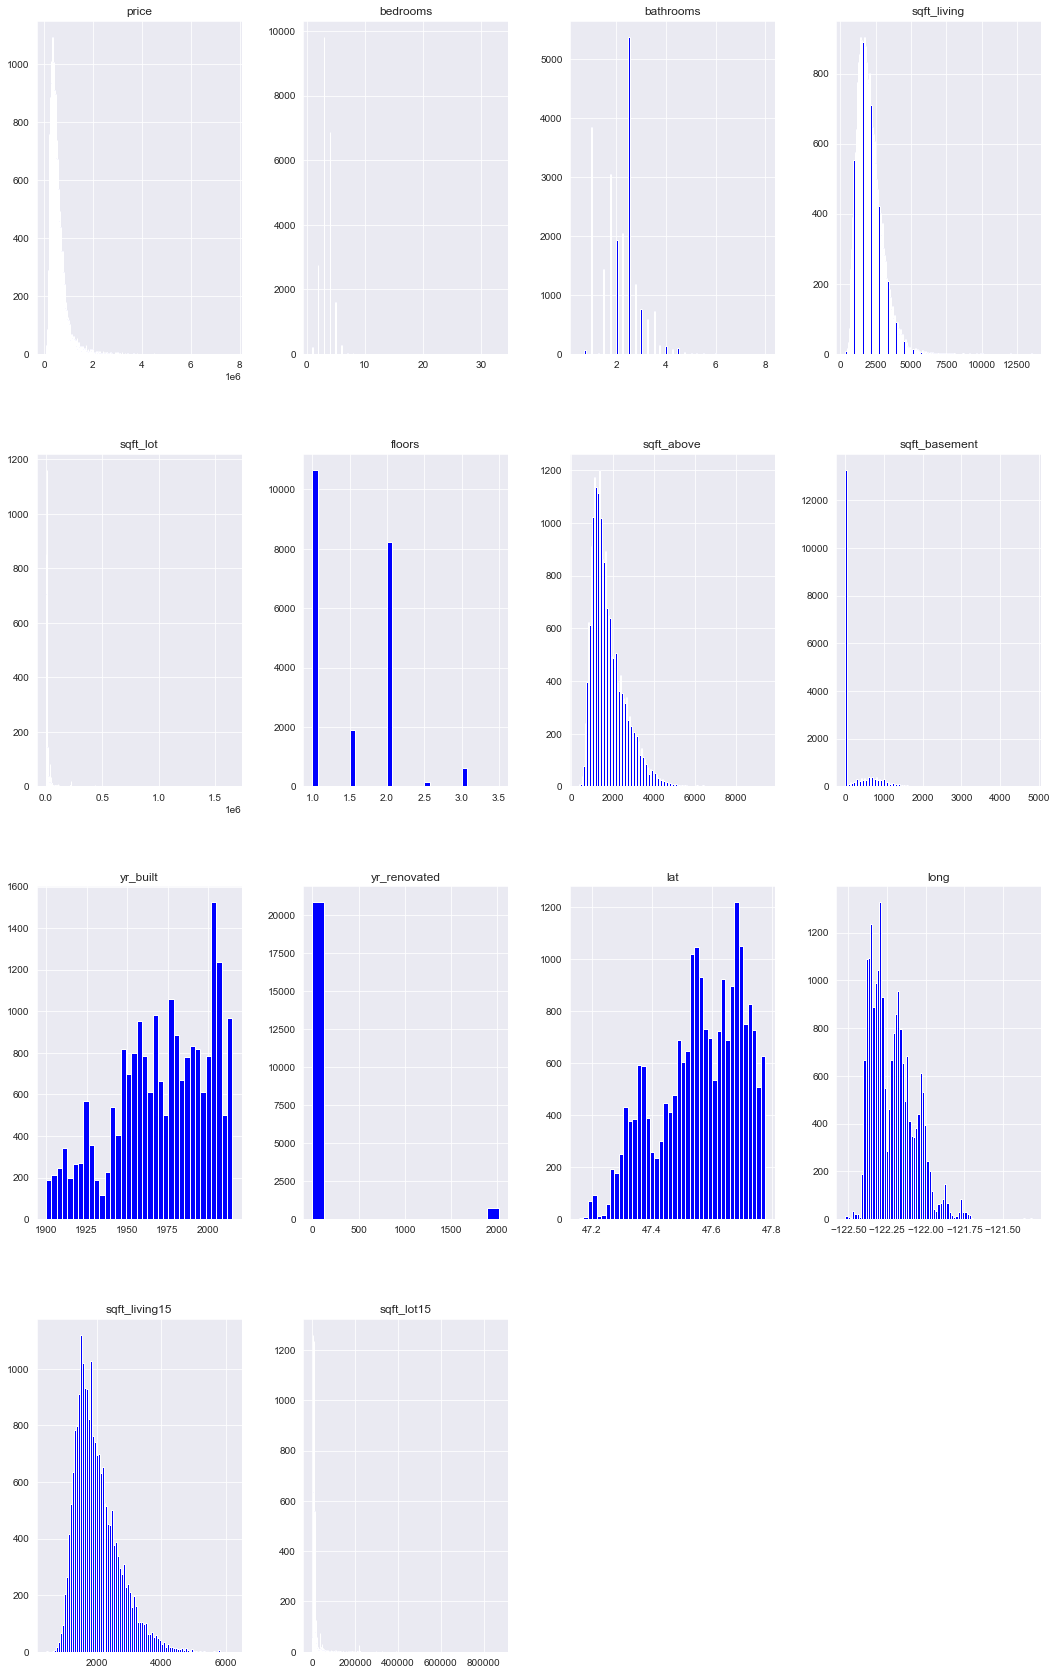

In [51]:
data.hist(figsize=(18,30), bins='auto', color = 'b');

In [52]:
# You observations here 

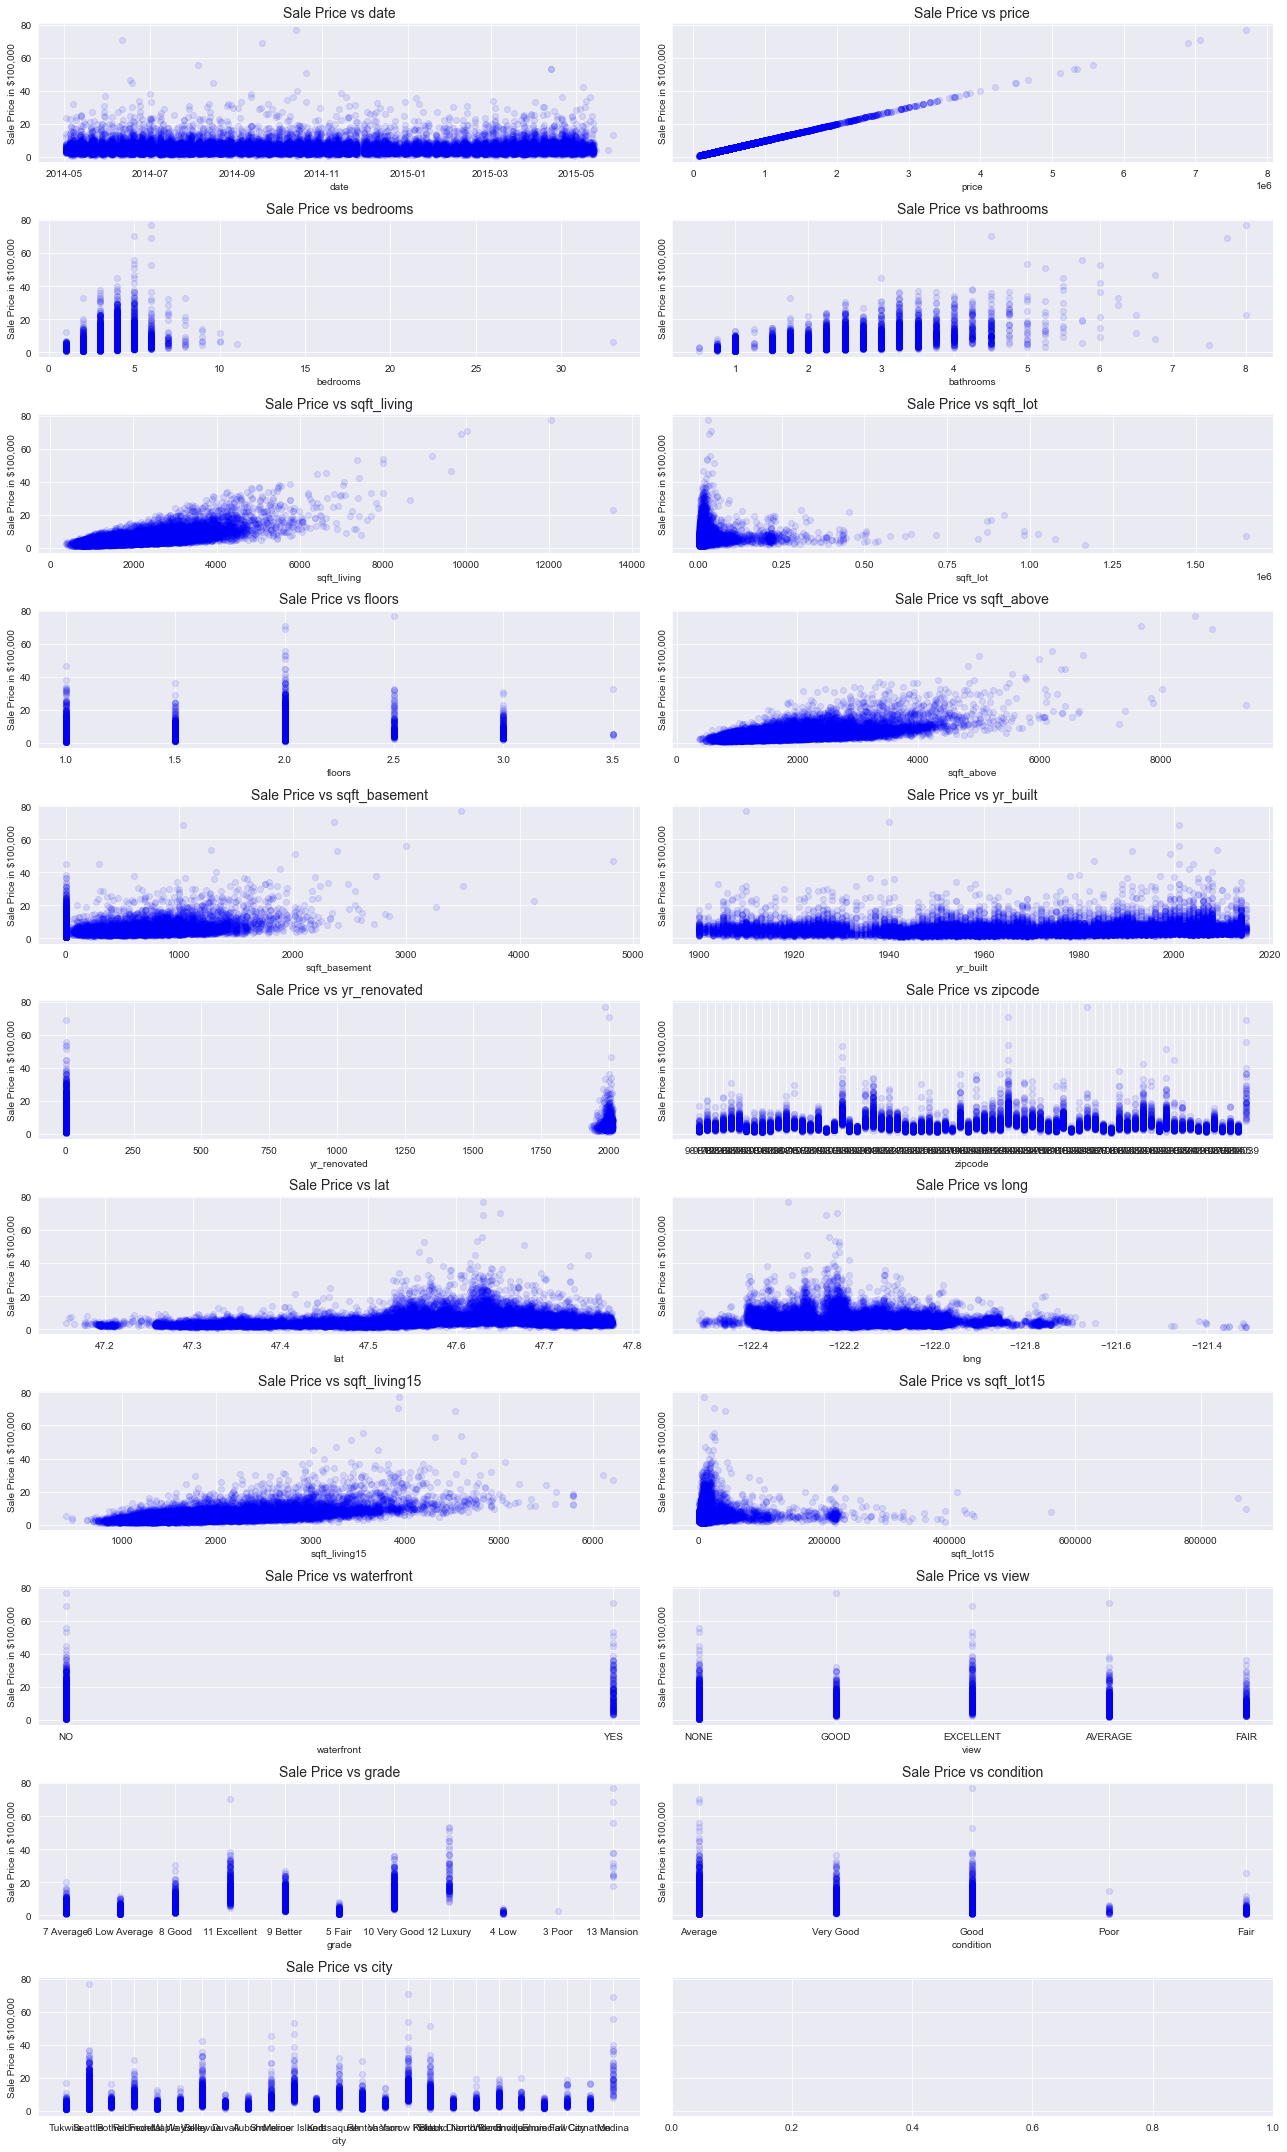

In [53]:
fig, axes = plt.subplots(nrows=11, ncols=2, figsize=(18,30), sharey=True)

for ax, column in zip(axes.flatten(), data.columns):
    ax.scatter(data[column], data['price'] / 100_000, label=column, color = 'b', alpha=.1)
    ax.set_title(f'Sale Price vs {column}', fontsize = 14)
    ax.set_xlabel(column)
    ax.set_ylabel('Sale Price in $100,000')

fig.tight_layout()

In [54]:
# Continuous var: 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'lat', 'long', 'sqft_living15', \
# 'sqft_lot15', 
# For now go under Continuous: 'bedrooms', 'bathrooms', 'floors' 
# Categorical var: 'zipcode', 'Waterfront', 'View', 'Grade', 'Condition', 'city'
# Unclear var: 'date', 'yr_built', 'yr_renovated'

In [55]:
# need to break the date column to 'Year_Sold' and 'Month_Sold'

### 3.1 Categorical variables

In [56]:
# Categorical var: 'zipcode', 'waterfront', 'view', 'grade', 'condition', 'city'

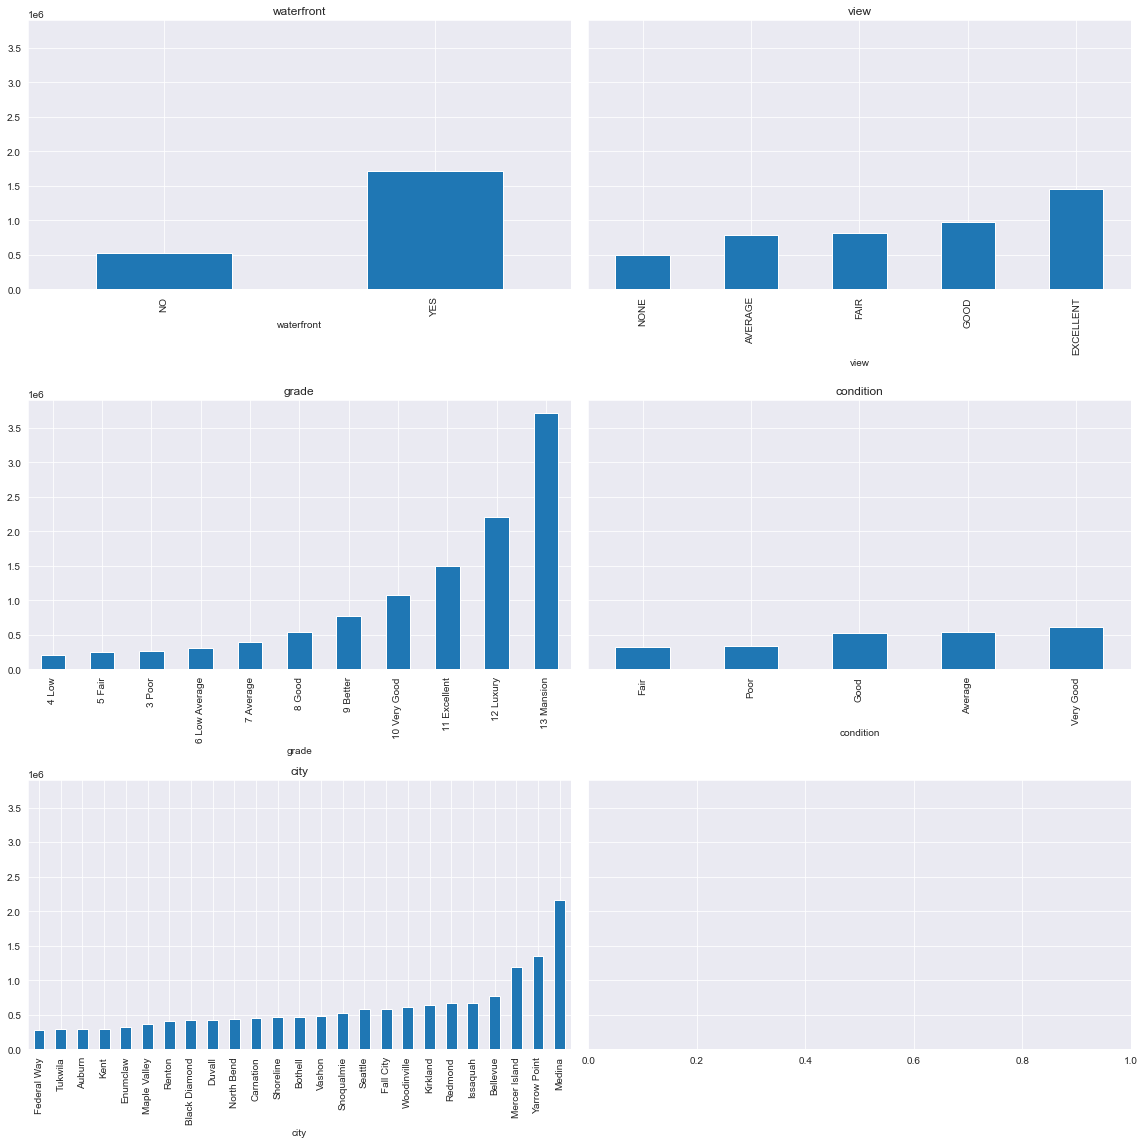

In [57]:
# Plot categorical variables against price with a bar graph. 

import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16,16), sharey=True)

categoricals = ['waterfront', 'view', 'grade', 'condition', 'city']

for col, ax in zip(categoricals, axes.flatten()):
    (df.groupby(col)               # group values together by column of interest
         .mean()['price']        # take the mean of the saleprice for each group
         .sort_values()              # sort the groups in ascending order
         .plot
         .bar(ax=ax))                # create a bar graph on the ax
    
    ax.set_title(col)                # Make the title the name of the column
    
fig.tight_layout()

In [58]:
# Create dummy variables for four categorical features

dummies = pd.get_dummies(df[categoricals], prefix=categoricals, drop_first=False)
drop_columns = ['waterfront_NO', 'view_NONE', 'grade_3 Poor', 'condition_Poor', 'city_Federal Way']
dummies = dummies.drop(drop_columns, axis=1)


In [59]:
df_preprocessed = df.drop(categoricals, axis=1)

df_preprocessed = pd.concat([df_preprocessed, dummies], axis=1)

df_preprocessed.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,...,city_North Bend,city_Redmond,city_Renton,city_Seattle,city_Shoreline,city_Snoqualmie,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,1180,0.0,...,0,0,0,0,0,0,1,0,0,0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,2170,400.0,...,0,0,0,1,0,0,0,0,0,0
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,770,0.0,...,0,0,0,0,0,0,0,0,0,0
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,1050,910.0,...,0,0,0,1,0,0,0,0,0,0
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,1680,0.0,...,0,1,0,0,0,0,0,0,0,0


In [60]:
df_preprocessed.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'waterfront_YES', 'view_AVERAGE', 'view_EXCELLENT', 'view_FAIR',
       'view_GOOD', 'grade_10 Very Good', 'grade_11 Excellent',
       'grade_12 Luxury', 'grade_13 Mansion', 'grade_4 Low', 'grade_5 Fair',
       'grade_6 Low Average', 'grade_7 Average', 'grade_8 Good',
       'grade_9 Better', 'condition_Average', 'condition_Fair',
       'condition_Good', 'condition_Very Good', 'city_Auburn', 'city_Bellevue',
       'city_Black Diamond', 'city_Bothell', 'city_Carnation', 'city_Duvall',
       'city_Enumclaw', 'city_Fall City', 'city_Issaquah', 'city_Kent',
       'city_Kirkland', 'city_Maple Valley', 'city_Medina',
       'city_Mercer Island', 'city_North Bend', 'city_Redmond', 'city_Renton',
       'city_Seattle', 'city_Shoreline', 'city_Snoqualmie', 'city_T

## 4. Correlation and Multicollinearity

In [61]:
# get rid of 'id' column
df_preprocessed = df_preprocessed.drop(['id', 'date', 'zipcode'], axis=1)
df_preprocessed.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,...,city_North Bend,city_Redmond,city_Renton,city_Seattle,city_Shoreline,city_Snoqualmie,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point
0,221900.0,3,1.00,1180,5650,1.0,1180,0.0,1955,0.0,...,0,0,0,0,0,0,1,0,0,0
1,538000.0,3,2.25,2570,7242,2.0,2170,400.0,1951,1991.0,...,0,0,0,1,0,0,0,0,0,0
2,180000.0,2,1.00,770,10000,1.0,770,0.0,1933,0.0,...,0,0,0,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960,5000,1.0,1050,910.0,1965,0.0,...,0,0,0,1,0,0,0,0,0,0
4,510000.0,3,2.00,1680,8080,1.0,1680,0.0,1987,0.0,...,0,1,0,0,0,0,0,0,0,0


In [62]:
df_preprocessed.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,...,city_North Bend,city_Redmond,city_Renton,city_Seattle,city_Shoreline,city_Snoqualmie,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point
price,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.605368,0.321108,0.053953,0.117855,...,-0.027633,0.091361,-0.105250,0.068986,-0.051205,-0.003493,-0.135491,-0.010229,0.031379,0.271184
bedrooms,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,0.479386,0.297229,0.155670,0.017900,...,-0.014489,0.038710,0.041070,-0.165017,-0.029004,0.022368,-0.036531,-0.047442,0.023691,0.063470
bathrooms,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.686668,0.278485,0.507173,0.047177,...,0.000611,0.109645,0.005241,-0.168740,-0.085840,0.068472,-0.109069,-0.019730,0.042853,0.065358
sqft_living,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.876448,0.428660,0.318152,0.051060,...,-0.001088,0.128207,0.006254,-0.204704,-0.065884,0.065256,-0.094287,-0.015054,0.080569,0.110169
sqft_lot,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.184139,0.015031,0.052946,0.004979,...,0.085972,0.025834,-0.008145,-0.156488,-0.033799,0.005919,-0.030574,0.144661,0.092964,-0.005880
floors,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.523989,-0.241866,0.489193,0.003793,...,0.001964,0.073740,-0.014614,0.028564,-0.084828,0.085619,-0.100860,-0.011466,0.013382,-0.014004
sqft_above,0.605368,0.479386,0.686668,0.876448,0.184139,0.523989,1.000000,-0.051175,0.424037,0.020645,...,0.019015,0.173742,0.037791,-0.283018,-0.082404,0.097846,-0.115314,-0.009110,0.097531,0.093078
sqft_basement,0.321108,0.297229,0.278485,0.428660,0.015031,-0.241866,-0.051175,1.000000,-0.130085,0.065008,...,-0.036673,-0.058129,-0.057943,0.102012,0.018402,-0.047514,0.020337,-0.013269,-0.013606,0.056463
yr_built,0.053953,0.155670,0.507173,0.318152,0.052946,0.489193,0.424037,-0.130085,1.000000,-0.202555,...,0.051349,0.174610,0.083256,-0.408391,-0.074523,0.106996,-0.098975,-0.008224,0.059855,0.001954
yr_renovated,0.117855,0.017900,0.047177,0.051060,0.004979,0.003793,0.020645,0.065008,-0.202555,1.000000,...,-0.006537,-0.031601,-0.027165,0.086753,0.004286,-0.014220,-0.012244,0.010196,-0.012660,0.036181


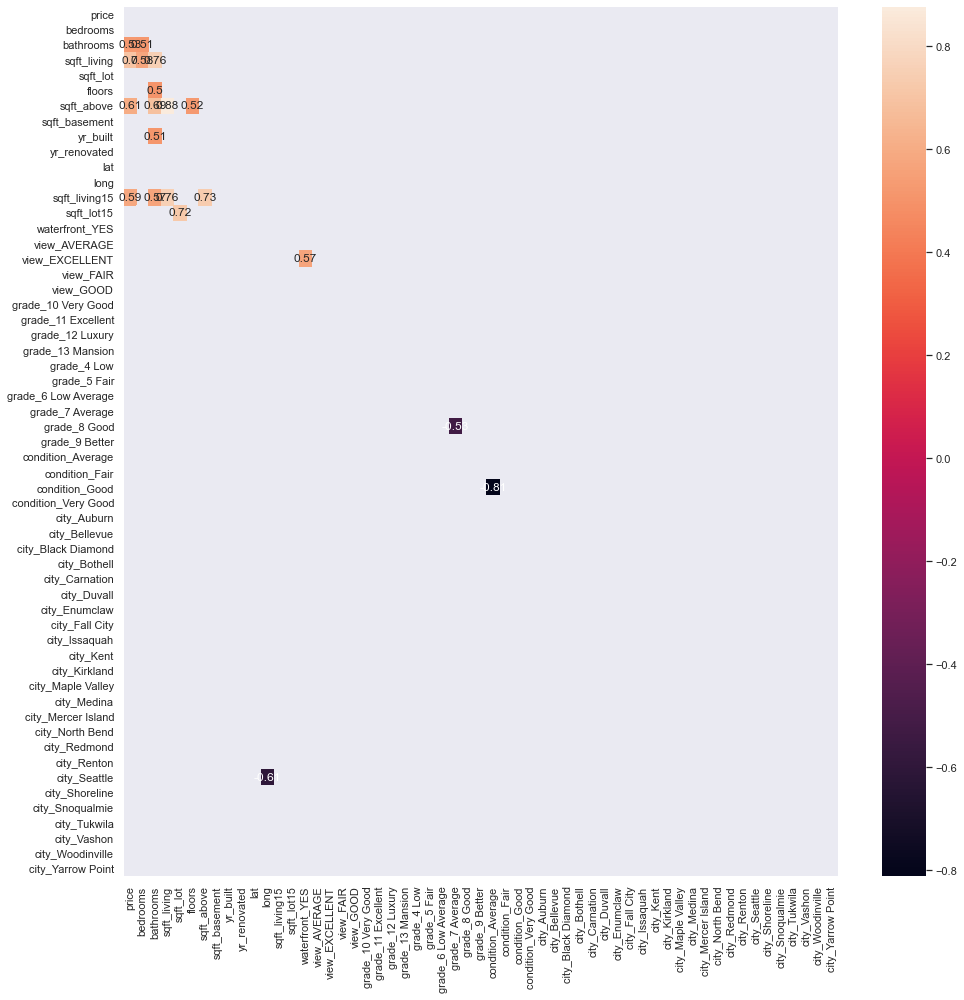

In [63]:
# Use the .heatmap method to illustrate the correlation. 
corr = df_preprocessed.corr()
trimask = np.triu(np.ones_like(corr, dtype = 'bool'))
sns.set(rc={'figure.figsize':(16, 16)})
sns.heatmap(corr, mask=trimask | (np.abs(corr) <= 0.5), annot=True);

In [64]:
# Let's look at the correlations with 'price'
# (our dependent variable) in particular.

df_corrs = df_preprocessed.corr()['price'].map(abs).sort_values(ascending=False)
df_corrs

price                  1.000000
sqft_living            0.701917
sqft_above             0.605368
sqft_living15          0.585241
bathrooms              0.525906
grade_11 Excellent     0.357589
grade_10 Very Good     0.340944
sqft_basement          0.321108
grade_7 Average        0.316053
bedrooms               0.308787
lat                    0.306692
view_EXCELLENT         0.303059
grade_12 Luxury        0.291068
city_Yarrow Point      0.271184
waterfront_YES         0.264306
floors                 0.256804
grade_9 Better         0.235859
city_Medina            0.212561
grade_13 Mansion       0.211806
grade_6 Low Average    0.209463
city_Mercer Island     0.204952
view_GOOD              0.182932
city_Kent              0.159079
view_AVERAGE           0.147179
city_Bellevue          0.141177
city_Tukwila           0.135491
yr_renovated           0.117855
city_Auburn            0.106397
city_Renton            0.105250
view_FAIR              0.092597
city_Redmond           0.091361
sqft_lot

In [65]:
# checking multicollinearity with VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [66]:
X_const = sm.add_constant(df_preprocessed)

In [67]:
# Creating VIF Dictionary.
vif_dct = {}

# Loop through each row and set the variable name to the VIF. 
for i in range(len(X_const.columns)):
    vif = variance_inflation_factor(X_const.values, i)
    v = X_const.columns[i]
    vif_dct[v] = vif

vif_dct

{'const': 10540994.510264529,
 'price': 5.17907277297269,
 'bedrooms': 1.7566640070677246,
 'bathrooms': 3.4492975355170743,
 'sqft_living': 147.6313321603192,
 'sqft_lot': 2.1238931536430767,
 'floors': 2.305247532184346,
 'sqft_above': 120.20571091953653,
 'sqft_basement': 33.153186137359306,
 'yr_built': 2.8856125291688945,
 'yr_renovated': 1.1440858297321854,
 'lat': 7.998448471236153,
 'long': 12.607343178369998,
 'sqft_living15': 3.2195752851704453,
 'sqft_lot15': 2.2568316823698047,
 'waterfront_YES': 1.6115487229217111,
 'view_AVERAGE': 1.0968272934249212,
 'view_EXCELLENT': 1.6224678685323932,
 'view_FAIR': 1.045263540164557,
 'view_GOOD': 1.1265737715398556,
 'grade_10 Very Good': 1083.4109353563852,
 'grade_11 Excellent': 396.09960565199344,
 'grade_12 Luxury': 90.66164249371099,
 'grade_13 Mansion': 14.270229856265836,
 'grade_4 Low': 28.112277052400042,
 'grade_5 Fair': 241.51421627887402,
 'grade_6 Low Average': 1856.2140773714036,
 'grade_7 Average': 5275.115060855753,
 

In [68]:
# the independent variables set
X = df_preprocessed
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

                feature            VIF
0                 price      16.233803
1              bedrooms      25.046588
2             bathrooms      29.555020
3           sqft_living     905.514908
4              sqft_lot       2.404507
5                floors      19.892442
6            sqft_above     680.737244
7         sqft_basement      47.140000
8              yr_built   12844.969748
9          yr_renovated       1.183139
10                  lat  857099.634187
11                 long  897520.594215
12        sqft_living15      30.212276
13           sqft_lot15       2.744188
14       waterfront_YES       1.620220
15         view_AVERAGE       1.147664
16       view_EXCELLENT       1.646618
17            view_FAIR       1.061445
18            view_GOOD       1.153679
19   grade_10 Very Good    1141.712001
20   grade_11 Excellent     402.956225
21      grade_12 Luxury      90.888728
22     grade_13 Mansion      14.256232
23          grade_4 Low      28.096899
24         grade_5 Fair  

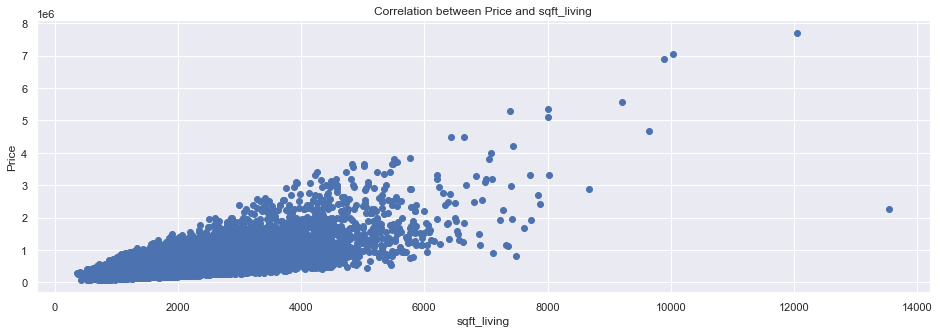

In [69]:
# Correlation between average rating and number of votes 
fig, ax = plt.subplots(figsize=(16, 5))

# Plot data
ax.scatter(x = df_preprocessed.sqft_living, y = df_preprocessed.price)

# Customize appearance
ax.tick_params(axis="x", labelrotation=0)
ax.set_xlabel("sqft_living")
ax.set_ylabel("Price")
ax.set_title("Correlation between Price and sqft_living");

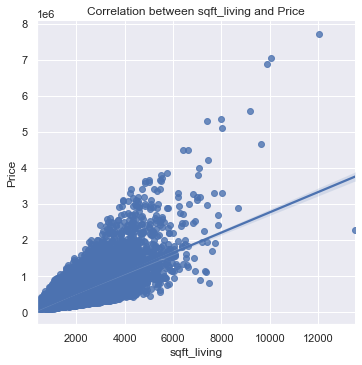

In [70]:
# like that it is showing best fit line. 
ax = sns.lmplot(x="sqft_living", y="price", data=df_preprocessed)
ax.set(xlabel='sqft_living', ylabel='Price')
plt.title('Correlation between sqft_living and Price')
plt.savefig('Correlation bw sqft_living and Price.png', bbox_inches='tight');

### 4.1 Multicollinearity

In [71]:
# checking on multicollinearity among predictor variables
df_pred = df_preprocessed.drop('price', axis=1)
df_pred.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,lat,...,city_North Bend,city_Redmond,city_Renton,city_Seattle,city_Shoreline,city_Snoqualmie,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point
0,3,1.00,1180,5650,1.0,1180,0.0,1955,0.0,47.5112,...,0,0,0,0,0,0,1,0,0,0
1,3,2.25,2570,7242,2.0,2170,400.0,1951,1991.0,47.7210,...,0,0,0,1,0,0,0,0,0,0
2,2,1.00,770,10000,1.0,770,0.0,1933,0.0,47.7379,...,0,0,0,0,0,0,0,0,0,0
3,4,3.00,1960,5000,1.0,1050,910.0,1965,0.0,47.5208,...,0,0,0,1,0,0,0,0,0,0
4,3,2.00,1680,8080,1.0,1680,0.0,1987,0.0,47.6168,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
# create a scatter matrix for King County House data
sm = pd.plotting.scatter_matrix(df_pred, figsize=[20, 20]);

# Rotates the text
[s.xaxis.label.set_rotation(90) for s in sm.reshape(-1)]
[s.yaxis.label.set_rotation(0) for s in sm.reshape(-1)]

#May need to offset label when rotating to prevent overlap of figure
[s.get_yaxis().set_label_coords(-1,0.5) for s in sm.reshape(-1)]

#Hide all ticks
[s.set_xticks(()) for s in sm.reshape(-1)]
[s.set_yticks(()) for s in sm.reshape(-1)]

plt.show()

In [73]:
# correlation matrix
df_pred.corr()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,lat,...,city_North Bend,city_Redmond,city_Renton,city_Seattle,city_Shoreline,city_Snoqualmie,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point
bedrooms,1.000000,0.514508,0.578212,0.032471,0.177944,0.479386,0.297229,0.155670,0.017900,-0.009951,...,-0.014489,0.038710,0.041070,-0.165017,-0.029004,0.022368,-0.036531,-0.047442,0.023691,0.063470
bathrooms,0.514508,1.000000,0.755758,0.088373,0.502582,0.686668,0.278485,0.507173,0.047177,0.024280,...,0.000611,0.109645,0.005241,-0.168740,-0.085840,0.068472,-0.109069,-0.019730,0.042853,0.065358
sqft_living,0.578212,0.755758,1.000000,0.173453,0.353953,0.876448,0.428660,0.318152,0.051060,0.052155,...,-0.001088,0.128207,0.006254,-0.204704,-0.065884,0.065256,-0.094287,-0.015054,0.080569,0.110169
sqft_lot,0.032471,0.088373,0.173453,1.000000,-0.004814,0.184139,0.015031,0.052946,0.004979,-0.085514,...,0.085972,0.025834,-0.008145,-0.156488,-0.033799,0.005919,-0.030574,0.144661,0.092964,-0.005880
floors,0.177944,0.502582,0.353953,-0.004814,1.000000,0.523989,-0.241866,0.489193,0.003793,0.049239,...,0.001964,0.073740,-0.014614,0.028564,-0.084828,0.085619,-0.100860,-0.011466,0.013382,-0.014004
sqft_above,0.479386,0.686668,0.876448,0.184139,0.523989,1.000000,-0.051175,0.424037,0.020645,-0.001199,...,0.019015,0.173742,0.037791,-0.283018,-0.082404,0.097846,-0.115314,-0.009110,0.097531,0.093078
sqft_basement,0.297229,0.278485,0.428660,0.015031,-0.241866,-0.051175,1.000000,-0.130085,0.065008,0.109853,...,-0.036673,-0.058129,-0.057943,0.102012,0.018402,-0.047514,0.020337,-0.013269,-0.013606,0.056463
yr_built,0.155670,0.507173,0.318152,0.052946,0.489193,0.424037,-0.130085,1.000000,-0.202555,-0.148370,...,0.051349,0.174610,0.083256,-0.408391,-0.074523,0.106996,-0.098975,-0.008224,0.059855,0.001954
yr_renovated,0.017900,0.047177,0.051060,0.004979,0.003793,0.020645,0.065008,-0.202555,1.000000,0.027970,...,-0.006537,-0.031601,-0.027165,0.086753,0.004286,-0.014220,-0.012244,0.010196,-0.012660,0.036181
lat,-0.009951,0.024280,0.052155,-0.085514,0.049239,-0.001199,0.109853,-0.148370,0.027970,1.000000,...,-0.063701,0.196581,-0.167374,0.222456,0.321573,-0.024593,-0.089516,-0.076000,0.203451,0.049412


In [74]:
abs(df_pred.corr()) > 0.75

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,lat,...,city_North Bend,city_Redmond,city_Renton,city_Seattle,city_Shoreline,city_Snoqualmie,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point
bedrooms,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bathrooms,False,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_living,False,True,True,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_lot,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_above,False,False,True,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_basement,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
yr_built,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
yr_renovated,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
lat,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [75]:
# create variable pairs from the correlation matrix that have correlations over .75

df_pairs=df_pred.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df_pairs['pairs'] = list(zip(df_pairs.level_0, df_pairs.level_1))

# set index to pairs
df_pairs.set_index(['pairs'], inplace = True)

#d rop level columns
df_pairs.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df_pairs.columns = ['cc']

# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
df_pairs.drop_duplicates(inplace=True)

In [76]:
# correlation pairs
df_pairs[(df_pairs.cc>.75) & (df_pairs.cc <1)]

,cc
pairs,
"(sqft_living, sqft_above)",0.876448
"(condition_Average, condition_Good)",0.812294
"(sqft_living15, sqft_living)",0.756402
"(bathrooms, sqft_living)",0.755758


### 4.1 Recursive Feature Elimination in Scikit-Learn

In [77]:
lr_rfe = LinearRegression()
select = RFE(lr_rfe, n_features_to_select=3)

In [78]:
# create a df copy with no categorical data for Linear Regression modeling. 
df_num = df_preprocessed.copy()

In [79]:
df_num.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,...,city_North Bend,city_Redmond,city_Renton,city_Seattle,city_Shoreline,city_Snoqualmie,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point
0,221900.0,3,1.00,1180,5650,1.0,1180,0.0,1955,0.0,...,0,0,0,0,0,0,1,0,0,0
1,538000.0,3,2.25,2570,7242,2.0,2170,400.0,1951,1991.0,...,0,0,0,1,0,0,0,0,0,0
2,180000.0,2,1.00,770,10000,1.0,770,0.0,1933,0.0,...,0,0,0,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960,5000,1.0,1050,910.0,1965,0.0,...,0,0,0,1,0,0,0,0,0,0
4,510000.0,3,2.00,1680,8080,1.0,1680,0.0,1987,0.0,...,0,1,0,0,0,0,0,0,0,0


In [80]:
ss = StandardScaler()
ss.fit(df_num.drop('price', axis=1))

df_scaled = ss.transform(df_num.drop('price', axis=1))

In [81]:
select.fit(X=df_scaled, y=df['price'])

RFE(estimator=LinearRegression(), n_features_to_select=3)

In [82]:
select.support_

array([False, False,  True, False, False, False, False, False, False,
        True, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [83]:
select.ranking_

array([25,  9,  1, 38, 53, 26, 41,  7, 34,  1, 42, 30, 39,  1, 27, 13, 33,
       17,  6,  4,  3,  5, 47, 45, 37, 46, 11,  8, 20, 40, 19, 18, 50, 48,
       44, 15, 28, 22, 31, 54, 35, 36, 29, 49, 10, 12, 52, 23, 24, 51, 14,
       32, 21, 43, 16,  2])

In [84]:
df_num.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat',
       'long', 'sqft_living15', 'sqft_lot15', 'waterfront_YES', 'view_AVERAGE',
       'view_EXCELLENT', 'view_FAIR', 'view_GOOD', 'grade_10 Very Good',
       'grade_11 Excellent', 'grade_12 Luxury', 'grade_13 Mansion',
       'grade_4 Low', 'grade_5 Fair', 'grade_6 Low Average', 'grade_7 Average',
       'grade_8 Good', 'grade_9 Better', 'condition_Average', 'condition_Fair',
       'condition_Good', 'condition_Very Good', 'city_Auburn', 'city_Bellevue',
       'city_Black Diamond', 'city_Bothell', 'city_Carnation', 'city_Duvall',
       'city_Enumclaw', 'city_Fall City', 'city_Issaquah', 'city_Kent',
       'city_Kirkland', 'city_Maple Valley', 'city_Medina',
       'city_Mercer Island', 'city_North Bend', 'city_Redmond', 'city_Renton',
       'city_Seattle', 'city_Shoreline', 'city_Snoqualmie', 'city_Tukwila',
       'city_Vashon', '

Features are bathrooms, yr_renovated, sqft_lot15. 


In [85]:
# Multicollinearity among 'bathrooms', 'sqft_above',  and 'Grade'.

df_preds_2 = df[['sqft_above', 'yr_renovated', 'sqft_lot15']]
df_target = df['price']

In [86]:
#lr = LinearRegression()
lr_rfe.fit(df_preds_2, df_target)

LinearRegression()

In [87]:
lr_rfe.score(df_preds_2, df_target)

0.3788689251140699

In [88]:
df_preds_2.corr()

,sqft_above,yr_renovated,sqft_lot15
sqft_above,1.000000,0.020645,0.195077
yr_renovated,0.020645,1.000000,0.004286
sqft_lot15,0.195077,0.004286,1.000000


### 4.3 Forward Selection with statsmodel on adj R-square 

In [143]:
import statsmodels.api as sm


def forward_selected(data, response):
    """Linear model designed by forward selection.

    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data

    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
           evaluated by adjusted R-squared
    """
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = 0.0, 0.0
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {} + 1".format(response,
                                           ' + '.join(selected + [candidate]))
            score = sm.OLS(formula, data).fit().rsquared_adj
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score < best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {} + 1".format(response,
                                   ' + '.join(selected))
    model = sm.OLS(formula, data).fit()
    return model

In [146]:
model = forward_selected(df_preprocessed, 'price')

print(model.model.formula)
# sl ~ rk + yr + 1

print(model.rsquared_adj)
# 0.835190760538

TypeError: len() of unsized object

### 4.4 Stepwise selection with p-values

In [141]:
import statsmodels.api as sm

def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [142]:
result = stepwise_selection(model_data, df_preprocessed['price'], verbose=True)
print('resulting features:')
print(result)

Add  bedrooms                       with p-value 0.0
Add  sqft_basement                  with p-value 0.0
Add  floors                         with p-value 0.0
Add  sqft_living15                  with p-value 0.0


ValueError: list.remove(x): x not in list

## 5. Data Modeling

### 5.1 Base_Model

In [134]:
df_preprocessed.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat',
       'long', 'sqft_living15', 'sqft_lot15', 'waterfront_YES', 'view_AVERAGE',
       'view_EXCELLENT', 'view_FAIR', 'view_GOOD', 'grade_10 Very Good',
       'grade_11 Excellent', 'grade_12 Luxury', 'grade_13 Mansion',
       'grade_4 Low', 'grade_5 Fair', 'grade_6 Low Average', 'grade_7 Average',
       'grade_8 Good', 'grade_9 Better', 'condition_Average', 'condition_Fair',
       'condition_Good', 'condition_Very Good', 'city_Auburn', 'city_Bellevue',
       'city_Black Diamond', 'city_Bothell', 'city_Carnation', 'city_Duvall',
       'city_Enumclaw', 'city_Fall City', 'city_Issaquah', 'city_Kent',
       'city_Kirkland', 'city_Maple Valley', 'city_Medina',
       'city_Mercer Island', 'city_North Bend', 'city_Redmond', 'city_Renton',
       'city_Seattle', 'city_Shoreline', 'city_Snoqualmie', 'city_Tukwila',
       'city_Vashon', '

In [90]:
features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat',
       'long', 'sqft_living15', 'sqft_lot15']

In [97]:
model_data = df_preprocessed.loc[:, features]

In [98]:
price = df_preprocessed['price']

In [100]:
predictors = sm.add_constant(model_data)
baseline_model = sm.OLS(price, predictors).fit()
baseline_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.624
Method:                 Least Squares   F-statistic:                     2752.
Date:                Tue, 15 Feb 2022   Prob (F-statistic):               0.00
Time:                        14:38:04   Log-Likelihood:            -2.9684e+05
No. Observations:               21597   AIC:                         5.937e+05
Df Residuals:                   21583   BIC:                         5.938e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -5.461e+07   1.72e+06    -31.714      0.000    -5.8e+07   -5.12e+07
bedrooms      -5.604e+04   2090.828    -26.803      0.000   -6.01e+04   -5.19e+04
bathrooms      6.071e+04   3632.265     16.715      0.000    5.36e+04    6.78e+04
sqft_living     176.2393     20.188      8.730      0.000     136.669     215.810
sqft_lot          0.1914      0.054      3.570      0.000       0.086       0.297
floors         1.794e+04   3986.873      4.501      0.000    1.01e+04    2.58e+04
sqft_above       77.9995     20.202      3.861      0.000      38.401     117.598
sqft_basement    46.4267     20.051      2.315      0.021       7.126      85.728
yr_built      -2305.5069     73.692    -31.286      0.000   -2449.949   -2161.065
yr_renovated     34.9533      4.391      7.961      0.000      26.347      43.559
lat            5.868e+05   1.15e+04     50.970      0.000    5.64e+05    6.09e+05
long          -2.546e+05   1.31e+04    -19.455      0.000    -2.8e+05   -2.29e+05
sqft_living15    92.6138      3.616     25.614      0.000      85.527      99.701
sqft_lot15       -0.4098      0.082     -4.992      0.000      -0.571      -0.249
==============================================================================
Omnibus:                    17496.319   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1143154.271
Skew:                           3.440   Prob(JB):                         0.00
Kurtosis:                      37.972   Cond. No.                     5.68e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.68e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 5.1.1 Checking on multicollinearity with VIF

In [101]:
# the independent variables set
X = model_data
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
vif_data.sort_values('VIF', ascending = False, ignore_index=False)

,feature,VIF
10,long,126719.071815
9,lat,117073.839704
7,yr_built,7318.690247
2,sqft_living,894.763590
5,sqft_above,672.549384
6,sqft_basement,47.004998
1,bathrooms,28.318571
11,sqft_living15,24.175127
0,bedrooms,22.599281
4,floors,16.283639


In [102]:
model_data.corr()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
bedrooms,1.000000,0.514508,0.578212,0.032471,0.177944,0.479386,0.297229,0.155670,0.017900,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.514508,1.000000,0.755758,0.088373,0.502582,0.686668,0.278485,0.507173,0.047177,0.024280,0.224903,0.569884,0.088303
sqft_living,0.578212,0.755758,1.000000,0.173453,0.353953,0.876448,0.428660,0.318152,0.051060,0.052155,0.241214,0.756402,0.184342
sqft_lot,0.032471,0.088373,0.173453,1.000000,-0.004814,0.184139,0.015031,0.052946,0.004979,-0.085514,0.230227,0.144763,0.718204
floors,0.177944,0.502582,0.353953,-0.004814,1.000000,0.523989,-0.241866,0.489193,0.003793,0.049239,0.125943,0.280102,-0.010722
sqft_above,0.479386,0.686668,0.876448,0.184139,0.523989,1.000000,-0.051175,0.424037,0.020645,-0.001199,0.344842,0.731767,0.195077
sqft_basement,0.297229,0.278485,0.428660,0.015031,-0.241866,-0.051175,1.000000,-0.130085,0.065008,0.109853,-0.142369,0.199288,0.015885
yr_built,0.155670,0.507173,0.318152,0.052946,0.489193,0.424037,-0.130085,1.000000,-0.202555,-0.148370,0.409993,0.326377,0.070777
yr_renovated,0.017900,0.047177,0.051060,0.004979,0.003793,0.020645,0.065008,-0.202555,1.000000,0.027970,-0.064543,0.000683,0.004286
lat,-0.009951,0.024280,0.052155,-0.085514,0.049239,-0.001199,0.109853,-0.148370,0.027970,1.000000,-0.135371,0.048679,-0.086139


### 5.1.2 Checking on normality of feature data

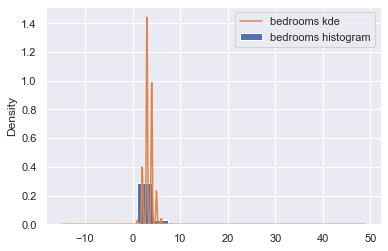

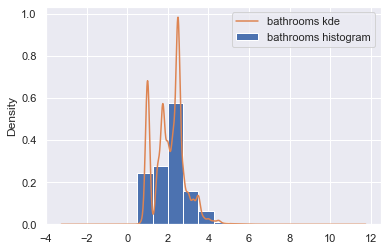

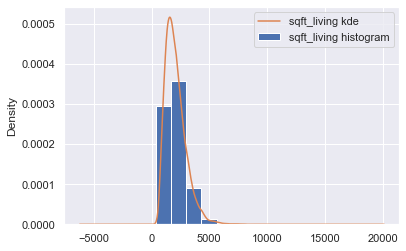

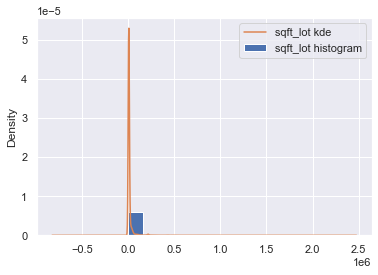

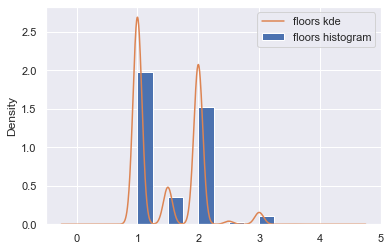

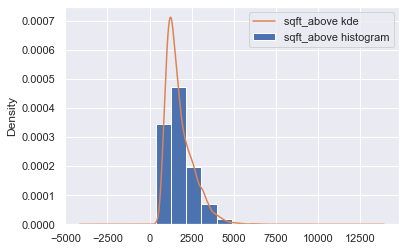

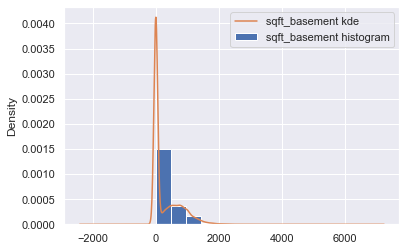

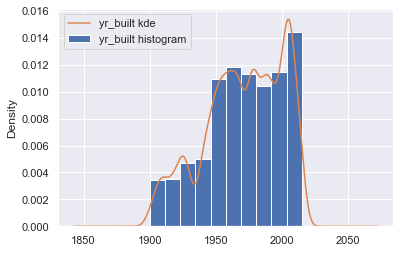

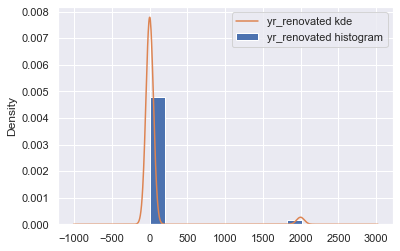

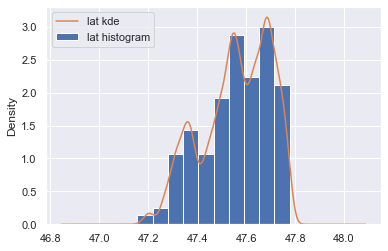

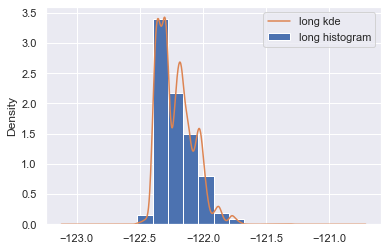

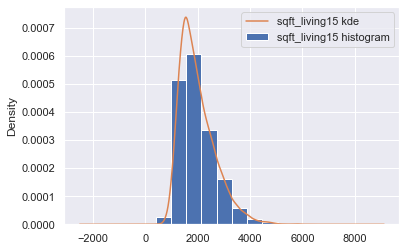

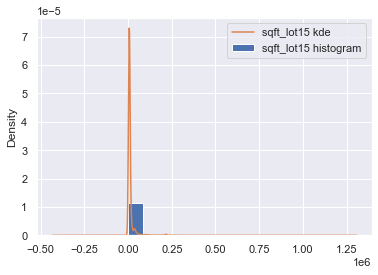

In [103]:
# For all the variables, check distribution by creating a histogram with kde
for column in model_data:
    model_data[column].plot.hist(density=True, label = column+' histogram')
    model_data[column].plot.kde(label =column+' kde')
    plt.legend()
    plt.show()

### 5.1.3 Check on linearity assumption

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

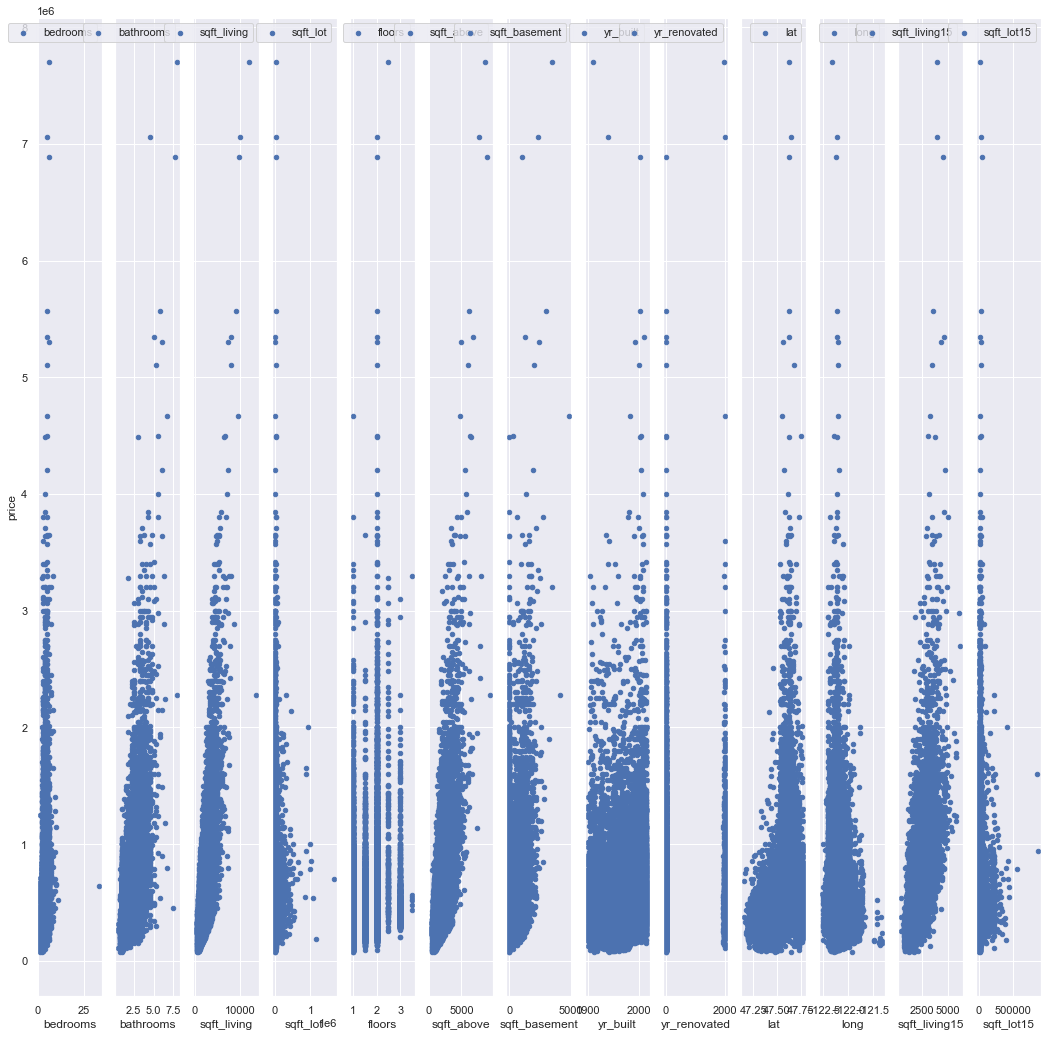

In [107]:
#Test for linearity assumption
fig, axs = plt.subplots(1, 13, sharey=True, figsize=(18, 18))
for idx, channel in enumerate(model_data):
    df_preprocessed.plot(kind='scatter', x=channel, y='price', ax=axs[idx], label=channel)
plt.legend()
plt.show()

### 5.1.4 Checking on normality of residuals

<AxesSubplot:ylabel='Count'>

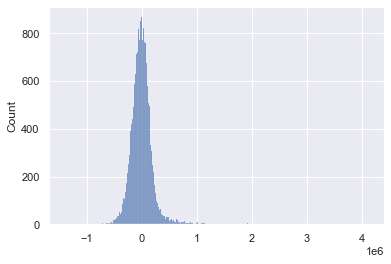

In [108]:
sns.histplot(baseline_model.resid)

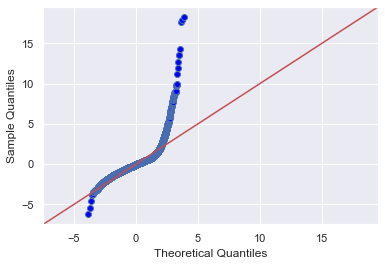

In [109]:
#checking in normality assumption for residuals

import scipy.stats as stats
residuals = baseline_model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

### 5.2 Model_2

In [110]:
# Model w/o 'sqft_living'

In [111]:
features_2 = ['bedrooms', 'bathrooms', 'sqft_lot', 'floors',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15', 'sqft_lot15']

In [112]:
model_data_2 = df_preprocessed.loc[:, features_2]

In [114]:
predictors_2 = sm.add_constant(model_data_2)
model_2 = sm.OLS(price, predictors_2).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.568
Model:                            OLS   Adj. R-squared:                  0.568
Method:                 Least Squares   F-statistic:                     2841.
Date:                Tue, 15 Feb 2022   Prob (F-statistic):               0.00
Time:                        15:47:34   Log-Likelihood:            -2.9832e+05
No. Observations:               21597   AIC:                         5.967e+05
Df Residuals:                   21586   BIC:                         5.968e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          6.736e+06   1.41e+05     47.691      0.000    6.46e+06    7.01e+06
bedrooms      -6.425e+04   2227.938    -28.840      0.000   -6.86e+04   -5.99e+04
bathrooms      7.144e+04   3861.111     18.502      0.000    6.39e+04     7.9e+04
sqft_lot          0.0183      0.057      0.319      0.750      -0.094       0.131
floors         5.565e+04   4165.720     13.359      0.000    4.75e+04    6.38e+04
sqft_above      244.2844      4.026     60.669      0.000     236.392     252.177
sqft_basement   252.8395      4.957     51.006      0.000     243.123     262.556
yr_built      -3503.5386     73.372    -47.751      0.000   -3647.352   -3359.725
yr_renovated     25.9261      4.699      5.517      0.000      16.715      35.137
sqft_living15    95.5693      3.811     25.080      0.000      88.100     103.038
sqft_lot15       -0.6892      0.088     -7.876      0.000      -0.861      -0.518
==============================================================================
Omnibus:                    15507.776   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           715122.558
Skew:                           2.947   Prob(JB):                         0.00
Kurtosis:                      30.567   Cond. No.                     4.35e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.35e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 5.2.1 Checking on multicollinearity with VIF

In [115]:
# the independent variables set
X = model_data_2
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
vif_data.sort_values('VIF', ascending = False, ignore_index=False)

,feature,VIF
6,yr_built,25.880509
1,bathrooms,24.339989
8,sqft_living15,23.643262
4,sqft_above,23.295595
0,bedrooms,22.205994
3,floors,15.669009
9,sqft_lot15,2.568513
5,sqft_basement,2.404824
2,sqft_lot,2.360191
7,yr_renovated,1.042661


### 5.3 Model_3

In [116]:
features_3 = ['sqft_above', 'sqft_basement', 'yr_renovated', 'sqft_lot15']

In [117]:
model_data_3 = df_preprocessed.loc[:, features_3]

In [120]:
predictors_3 = sm.add_constant(model_data_3)
model_3 = sm.OLS(price, predictors_3).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.499
Method:                 Least Squares   F-statistic:                     5389.
Date:                Tue, 15 Feb 2022   Prob (F-statistic):               0.00
Time:                        15:49:15   Log-Likelihood:            -2.9992e+05
No. Observations:               21597   AIC:                         5.998e+05
Df Residuals:                   21592   BIC:                         5.999e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -4.122e+04   4424.299     -9.317      0.000   -4.99e+04   -3.26e+04
sqft_above      279.8209      2.182    128.215      0.000     275.543     284.099
sqft_basement   291.3006      4.037     72.163      0.000     283.388     299.213
yr_renovated     83.1183      4.870     17.067      0.000      73.573      92.664
sqft_lot15       -0.6202      0.066     -9.377      0.000      -0.750      -0.491
==============================================================================
Omnibus:                    14530.316   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           508585.418
Skew:                           2.757   Prob(JB):                         0.00
Kurtosis:                      26.125   Cond. No.                     7.54e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.54e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 5.3.1 Checking on multicollinearity with VIF

In [121]:
# the independent variables set
X = model_data_3
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
vif_data.sort_values('VIF', ascending = False, ignore_index=False)

,feature,VIF
0,sqft_above,1.561867
1,sqft_basement,1.303426
3,sqft_lot15,1.267777
2,yr_renovated,1.039201


### 5.3.3 Log transformation on features

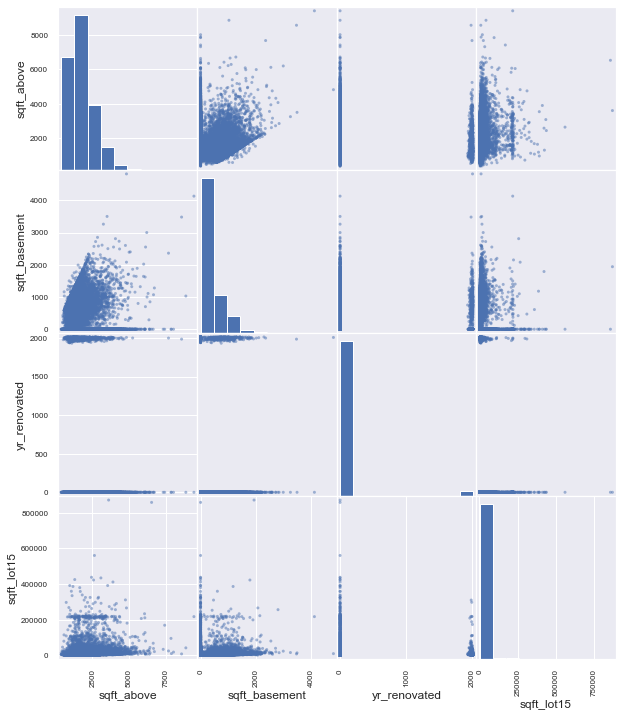

In [122]:
pd.plotting.scatter_matrix(model_data_3, figsize=(10,12));

ValueError: Axis limits cannot be NaN or Inf

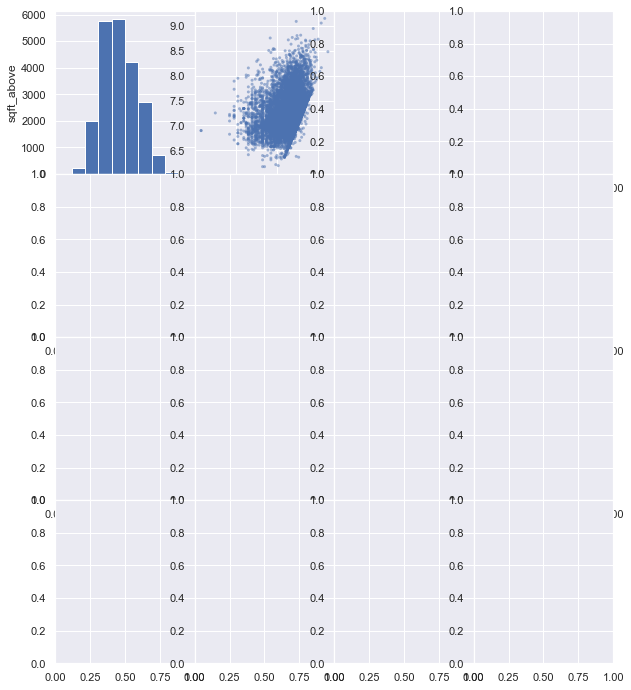

In [123]:
non_normal = features_3
for feat in non_normal:
    model_data_3[feat] = model_data_3[feat].map(lambda x: np.log(x))
pd.plotting.scatter_matrix(model_data_3[features_3], figsize=(10,12));

In [126]:
# Log transform and normalize
#ames_cont = ames[continuous]

# log features
log_names = [f'{column}_log' for column in model_data_3]

model_data_3_log = np.log(model_data_3)
model_data_3_log.columns = log_names

# normalize (subract mean and divide by std)

def normalize(feature):
    return (feature - feature.mean()) / feature.std()

model_data_3_log_norm = model_data_3_log.apply(normalize)

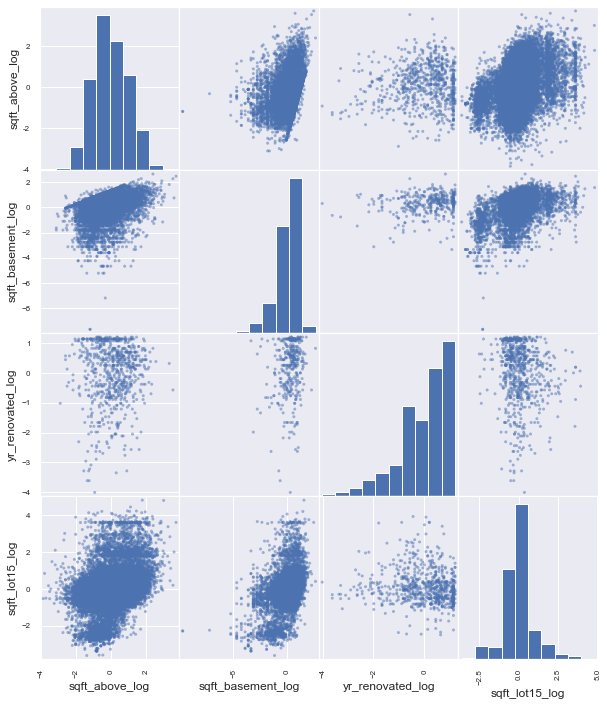

In [127]:
pd.plotting.scatter_matrix(model_data_3_log_norm, figsize=(10,12));

In [128]:
# rerunning the model after log transformation

model_3 = sm.OLS(price, model_data_3_log_norm).fit()
model_3.summary()

MissingDataError: exog contains inf or nans

In [129]:
model_data_3_log_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sqft_above_log     21597 non-null  float64
 1   sqft_basement_log  8317 non-null   float64
 2   yr_renovated_log   744 non-null    float64
 3   sqft_lot15_log     21597 non-null  float64
dtypes: float64(4)
memory usage: 675.0 KB


## 6. Feature Engineering

### 5.1 Relationship between view and price.

In [ ]:
df.View.unique()

In [ ]:
df['View'].hist(bins=5);

In [ ]:
df['Has_view'] = df['View'] >= 1

In [ ]:
df.corr()['price']['Has_view']

### 5.2 Relationship between grade and price

In [ ]:
df.grade.unique()

In [ ]:
df['Grade'].hist(bins=11)

In [ ]:
df['Livable_Grade'] = df['Grade'] > 8

In [ ]:
df.corr()['price']['Livable_Grade']

### 5.3 Polynomial Features

In [ ]:
pf = PolynomialFeatures(degree=3)

X = df_num.drop('price', axis=1)
y = df_num['price']

# Fitting the PolynomialFeatures object
pf.fit(X)

In [ ]:
pdf = pd.DataFrame(pf.transform(X), columns=pf.get_feature_names())
pdf

In [ ]:
# a no go, use product of features instead (multiplying)